<a href="https://colab.research.google.com/github/pablillo77/nlp_and_deep_learning/blob/main/DS_NLP_DeepLearning_Final_Pablo_Gim%C3%A9nez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 🎬 Introduction 🎬</b></div>

## Presentation ##
The present project is based on a Kaggle dataset about BBC articles. The objective is to train and produce an algorithm for accurate news classification into five categories, that could yield commericial applications, customizing user engagement and giving insights for targeted audiences.

## Audience ##

This includes both readers seeking relevant content and businesses interested in market research, who could use categorized news for industry insights.

## Comercial Context ##

Personalized content delivery could improve user satisfaction and time spent on the platform. The classified data could also be valuable to marketing advertisers for audience targeting.

## Key Hypotheses and Questions ##

- Effective categorization and personalized news recommendations enhance reader engagement and retention.
- How the categories are distributed?
- Can we predict categories in new content?

## Objectives ##

- Produce an accurate classification model using LSTM and or RNN.
- Acquire category-based insights.
- Set the bases for future work on trending category predictions.





<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧹 Preliminary data cleaning 🧹</b></div>

 </b></div>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳Libraries imports and data upload⏳
 </b></div>

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import string
import random


from collections import Counter
from wordcloud import WordCloud

# Sklearn mainly for model evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# NLTK for text processing
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tensorflow for creating and LSTM model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
#dataset load from github

#https://www.kaggle.com/code/dnkumars/lstm-model-bbc-articles-dataset/notebook?select=bbc_text_cls.csv
url = 'https://raw.githubusercontent.com/pablillo77/nlp_and_deep_learning/refs/heads/main/bbc_text_cls.csv'
df = pd.read_csv(url)
df.shape

(2225, 2)

In [3]:
#Some quick checks

pd.set_option('display.max_colwidth',None)
print("Data shape: ",df.shape)
print("Data types: ",df.dtypes)
df.sample(2)

Data shape:  (2225, 2)
Data types:  text      object
labels    object
dtype: object


,text,labels
1449,"Highbury tunnel players in clear\n\nThe Football Association has said it will not be bringing charges over the tunnel incident prior to the Arsenal and Manchester United game.\n\nArsenal's Patrick Vieira had earlier denied accusations that he threatened Gary Neville before the 4-2 defeat. Vieira also clashed with opposing skipper Roy Keane and referee Graham Poll had to separate them. ""The referee has confirmed that he is satisfied he dealt with the incident at the time,"" said an FA statement. It means United's win will pass off without further intervention from the governing body, whose new chief executive Brian Barwick was in the Highbury stands.\n\n""I didn't threaten anybody. They are big enough players to handle themselves,"" said Vieira. ""I had a talk with Roy Keane and that's it. Gary Neville is a big lad, he can handle himself. ""They just played better than us and deserved to win."" Neville admitted there had been incidents before the game, but insisted it had not distracted his focus. ""There were a couple of things that did happen before the game which disappoint you,"" he said. ""Especially from players of that calibre, but it's a tough game and we've been around a long time."" Neville admitted that he had not enjoyed the match, which was punctuated by fouls and the sending off of Mikael Silvestre for head-butting Freddie Ljungberg . ""I thought it was a horrible game in the first half, and it was not much better in the second,"" he said. ""There is no way that should have happened in a football match.""\n\nAfter the match, Keane accused Vieira of starting the row. ""Patrick Vieira is 6ft 4in and having a go at Gary Neville. So I said, 'have a go at me',"" he said. ""If he wants to intimidate our players and thinks that Gary Neville is an easy target, I'm not having it."" Manchester United manager Sir Alex Ferguson added: ""Vieira was well wound up for it. ""I've heard different stories. Patrick Vieira has apparently threatened some of our players and things like that.""",sport
7,"India calls for fair trade rules\n\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\n\nIn London on Thursday ahead of the meeting, India's finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\n\nPalaniappan Chidambaram, India's finance minister, argued that these organisations need to take into account the changing world order, given India and China's integration into the global economy. He said the issue is not globalisation but ""the terms of engagement in globalisation."" Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world's population. At a conference on developing enterprise hosted by UK finance minister Gordon Brown on Friday, he said that he was in favour of floating exchange rates because they help countries cope with economic shocks. ""A flexible exchange rate is one more channel for absorbing both positive and negative shocks,"" he told the conference. India, along with China, Brazil, South Africa and Russia, has been invited to take part in the G7 meeting taking place in London on Friday and Saturday. China is expected to face renewed pressure to abandon its fixed exchange rate, which G7 nations, in particular the US, have blamed for a surge in cheap Chinese exports. ""Some countries have tried to use fixed exchange rates. I do not wish to make any judgements,"" Mr Chidambaram said. Separately, the IMF warned on Thursday that India's budget deficit was too large and would hamper the country's economic growth, which it forecast to be around 6.5% in the year to March 2005. In the year to March 2004, the Indian economy grew by 8.5%.",business


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* We can appreciate the dataset has 2 columns, text and labels, consiting of 2225 entries. The data types are objects, "text" will be converted to string for further processing, and the labels will be encoded.
* In the random sample we see numbers, speciall chars such as new line characters that do not add value to the categorization, stop words and capital letters.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧹 Data preliminary cleanup 🧹</b></div>

In [4]:
df['text'] = df['text'].astype(str)	 # Convert to string before regex
df['text'] = df['text'].str.lower() # Conversion to lowercase

df['text'] = (
    df['text']
    .str.replace(r'\d+', '', regex=True)           # Remove digits
    .str.replace(r'[^\w\s]', '', regex=True)        # Remove special characters except for word chars and whitespace
    .str.replace(r'\n', ' ', regex=True)            # Replace newlines with space
    .str.replace(r'\\', '', regex=True)             # Remove any remaining backslashes
    .str.replace(r'"', '', regex=True)              # Remove double quotes
    .str.strip()                                    # Trim leading/trailing whitespace
)




<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🔎 Exploratory Data Analysis (EDA).🔎</b></div>

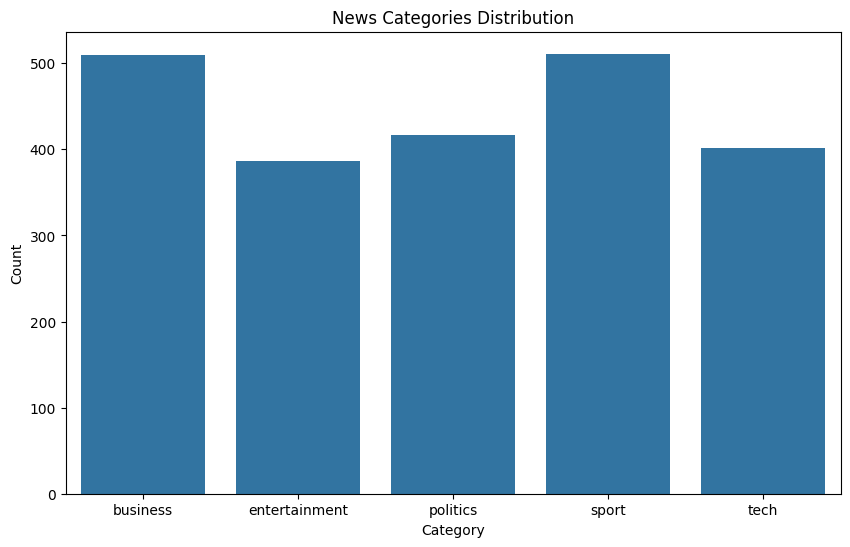

In [5]:
# Check categories distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='labels', data=df)
plt.title(f'News Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


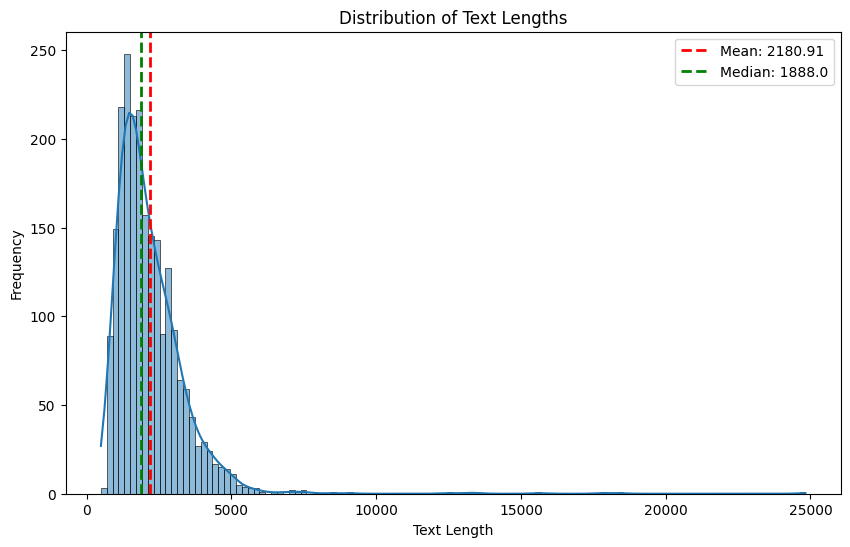

In [6]:
# Checking Text lenghts

df['text_length'] = df['text'].apply(len) # create a new column

mean_length = df['text_length'].mean()
median_length = df['text_length'].median()

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.legend()
plt.show()

In [7]:
# Find the longest text element and its length

longest_text = df['text'].iloc[df['text'].str.len().idxmax()]
longest_text_length = len(longest_text)

print(f"Longest text element:\n{longest_text}\n")
print(f"Character count: {longest_text_length}")

Longest text element:
terror powers expose tyranny  the lord chancellor has defended government plans to introduce control orders to keep foreign and british terrorist suspects under house arrest where there isnt enough evidence to put them on trial  lord falconer insists that the proposals do not equate to a police state and strike a balance between protecting the public against the threat of terrorism and upholding civil liberties but thriller writer frederick forsyth tells bbc news of his personal response to the move    there is a mortal danger aimed at the heart of britain or so says home secretary charles clarke my reaction so what it is not that i am cynical or just do not care i care about this country very much  but in the  years that i have been alive there has not been one hour of one day of one month of one year when there has not been a threat aimed at us my point is the british have always coped without becoming a dictatorship we have coped with fear without becoming a st

In [8]:
# Stopwords removal

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)


df['text']=df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


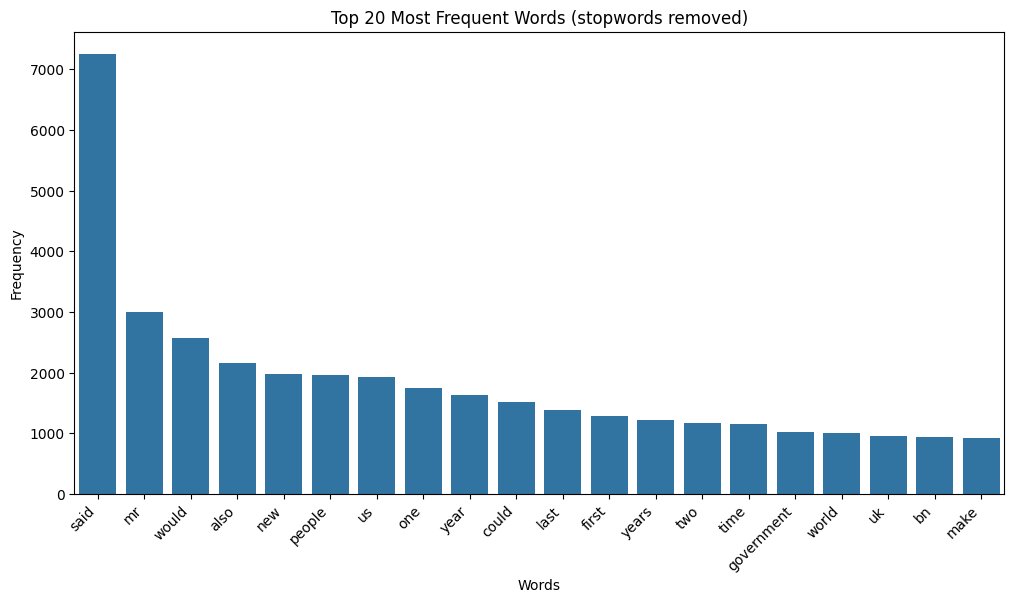

In [9]:
# Counting most frequent words

from collections import Counter

# Assuming 'df' and 'text' column exist as in the provided code
word_counts = Counter(" ".join(df['text']).split())
top_20_words = word_counts.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_20_words)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words (stopwords removed)')
plt.show()

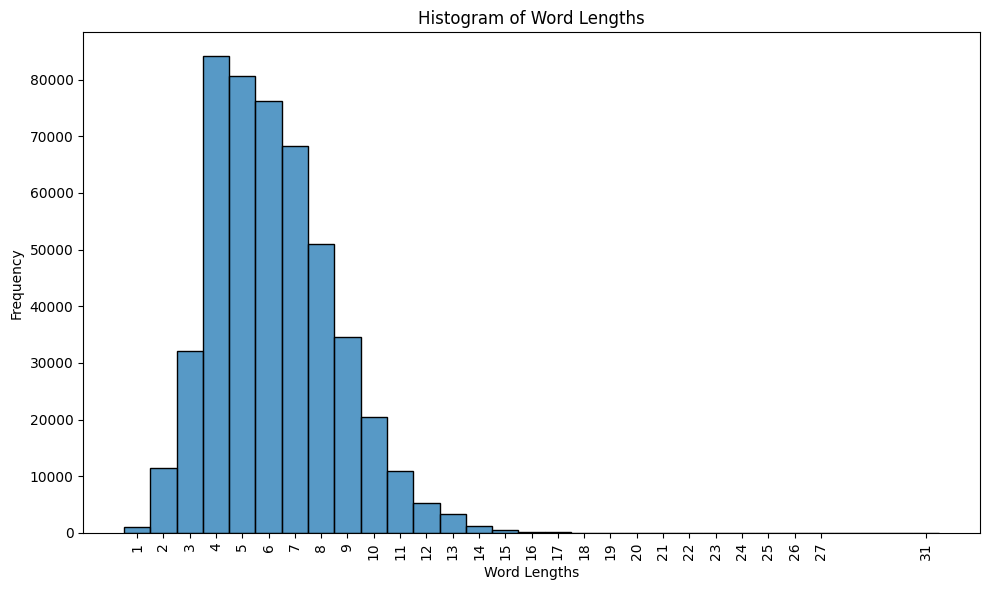

In [10]:
def word_length_histogram(df):
    word_lengths = []
    for text in df['text']:
        words = text.split()
        for word in words:
          word_lengths.append(len(word))

    unique_word_lengths = sorted(list(set(word_lengths)))

    plt.figure(figsize=(10, 6))
    sns.histplot(word_lengths, discrete=True)
    plt.xticks(unique_word_lengths, rotation=90)
    plt.xlabel('Word Lengths')
    plt.ylabel('Frequency')
    plt.title('Histogram of Word Lengths')
    plt.tight_layout()
    plt.show()

word_length_histogram(df)

In [11]:
# N-grams analysis

from nltk import ngrams


def analyze_ngrams(df, column_name, n=2):
    all_ngrams = []
    for text in df[column_name]:
        # Tokenize the text
        tokens = nltk.word_tokenize(str(text).lower())  # Convert to lowercase

        # Generate n-grams
        text_ngrams = list(ngrams(tokens, n))

        # Extend the list of all n-grams
        all_ngrams.extend(text_ngrams)

    # Count the frequency of each n-gram
    ngram_counts = Counter(all_ngrams)

    # Print or return the most frequent n-grams
    print(f"Top 10 most frequent {n}-grams:\n")
    for ngram, count in ngram_counts.most_common(10):
        print(f"{ngram}: {count}")


analyze_ngrams(df, 'text', n=2)  # Analyze bigrams
print("\n")
analyze_ngrams(df, 'text', n=3)  # Analyze trigrams
print("\n")
analyze_ngrams(df, 'text', n=4)  # Analyze 4grams

Top 10 most frequent 2-grams:

('last', 'year'): 384
('said', 'mr'): 359
('told', 'bbc'): 348
('mr', 'blair'): 296
('prime', 'minister'): 274
('mr', 'brown'): 214
('chief', 'executive'): 198
('said', 'would'): 192
('bbc', 'news'): 178
('general', 'election'): 172


Top 10 most frequent 3-grams:

('told', 'bbc', 'news'): 147
('bbc', 'news', 'website'): 94
('told', 'bbc', 'radio'): 76
('leader', 'michael', 'howard'): 55
('mr', 'blair', 'said'): 54
('million', 'dollar', 'baby'): 50
('radio', 'today', 'programme'): 49
('told', 'bbc', 'sport'): 48
('bbc', 'radio', 'today'): 47
('tory', 'leader', 'michael'): 41


Top 10 most frequent 4-grams:

('told', 'bbc', 'news', 'website'): 77
('bbc', 'radio', 'today', 'programme'): 44
('told', 'bbc', 'radio', 'today'): 39
('tory', 'leader', 'michael', 'howard'): 38
('prime', 'minister', 'tony', 'blair'): 26
('foreign', 'secretary', 'jack', 'straw'): 22
('home', 'secretary', 'charles', 'clarke'): 21
('bbc', 'radio', 'five', 'live'): 18
('shadow', 'chanc

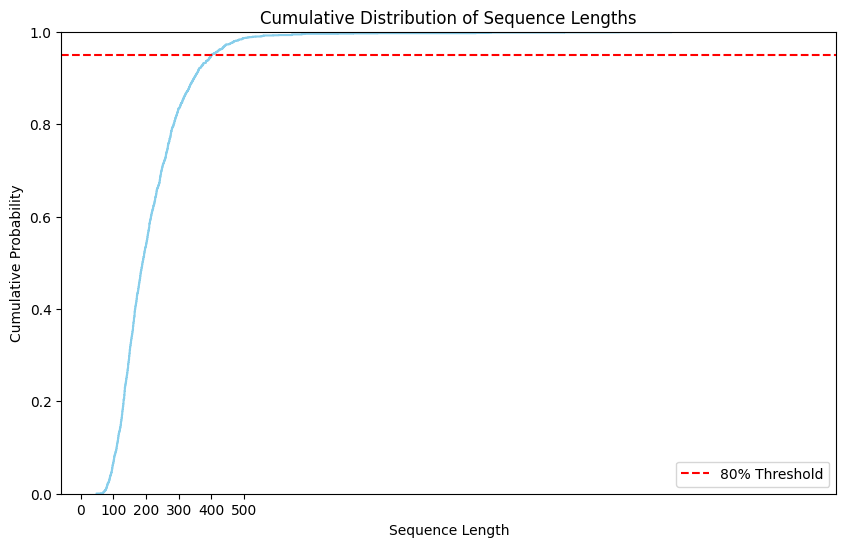

In [29]:
#Study the distribution of sequence lengths

# Prepare text data
texts = df['text'].values

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Calculate the length of each sequence
sequence_lengths = [len(seq) for seq in sequences]

# Create a DataFrame for easier analysis
lengths_df = pd.DataFrame(sequence_lengths, columns=['length'])

# Plot the cumulative distribution of sequence lengths using Seaborn
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=lengths_df, x='length', color='skyblue')
plt.xlabel('Sequence Length')
plt.xticks(range(0, 600, 100))
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Sequence Lengths')
plt.axhline(y=0.95, color='red', linestyle='--', label='80% Threshold')
plt.legend()
plt.show()



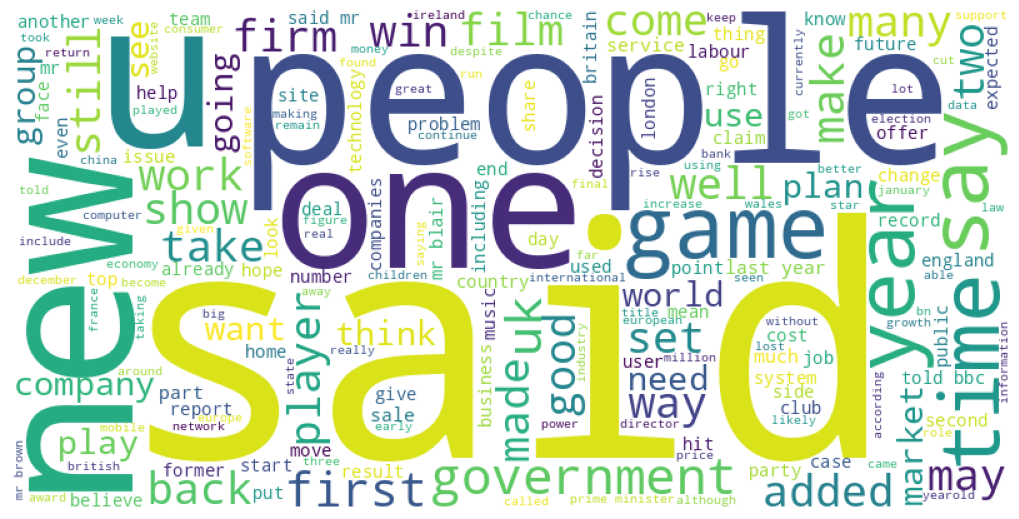

In [12]:
# Create the word cloud

text = " ".join(text for text in df['text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* The categories (labels) have a good classes balance in the dataset.
* Text lenght analysis, shows a distribution with a mean value of 218 characters, the longest text has 24829.
* Most frequent words are "said" and "mr", "would", consisten with the reporting tone and style of a news channel.
* The word lenghts analysis, indicates that having removed the stopwords (usually words of 2 or 3 letters if language is English) the next most frequent lengths are 4 and 5 letters long. Again there is agreement with the language used.
* N-Grams study shows context also in agreemnent with the reporting style of a news channel. "last year", "told BBC news" and "told BBC nwes website" are the most frequent for bigrams, trigrams and four-grams.

# Model

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare text data and labels
X = df['text'].values
y = df['labels'].values

# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, padding='post')

# Convert labels to integers if necessary
label_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y = np.array([label_mapping[label] for label in y])

# Define k-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a function to build the LSTM model
def build_model(input_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_length))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize lists to store accuracies
accuracies = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_pad):
    X_train, X_val = X_pad[train_index], X_pad[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build and train the model
    model = build_model(X_pad.shape[1], len(tokenizer.word_index) + 1)
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    accuracies.append(accuracy)

# Print the results
print(f'Accuracy for each fold: {accuracies}')
print(f'Mean accuracy: {np.mean(accuracies)}')
print(f'Standard deviation: {np.std(accuracies)}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.1926 - loss: 1.6127 - val_accuracy: 0.2292 - val_loss: 1.5965
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.2312 - loss: 1.6060 - val_accuracy: 0.2292 - val_loss: 1.6027
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.2184 - loss: 1.6103 - val_accuracy: 0.2584 - val_loss: 1.5949
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.2294 - loss: 1.6029 - val_accuracy: 0.2292 - val_loss: 1.5986
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.2252 - loss: 1.6021 - val_accuracy: 0.2292 - val_loss: 1.5986
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0991 - loss: 1.5838
Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.2206 - loss: 1.6062 - val_accuracy: 0.2202 - val_loss: 1.6062
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.2335 - loss: 1.6039 - val_accuracy: 0.2202 - val_loss: 1.6067
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s

In [74]:
# Prepare text data and labels
X = df['text'].values
y = df['labels'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train = pd.Series(X_train)
X_test = pd.Series(X_test)

# Tokenization and padding
max_words = 10000  # Number of unique words to use
max_length = 350  # Maximum length of input sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)
#X_train_padded = pad_sequences(X_train_sequences)
#X_test_padded = pad_sequences(X_test_sequences)

# Building the LSTM model and GRU
from tensorflow.keras.layers import GRU, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=256, input_length=max_length))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [75]:
# Training the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.3448 - loss: 1.4568 - val_accuracy: 0.7079 - val_loss: 0.7615
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8785 - loss: 0.4478 - val_accuracy: 0.8202 - val_loss: 0.5585
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9711 - loss: 0.1413 - val_accuracy: 0.8371 - val_loss: 0.5561
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9738 - loss: 0.1030 - val_accuracy: 0.8596 - val_loss: 0.4862
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9652 - loss: 0.1602 - val_accuracy: 0.7978 - val_loss: 0.6920
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9930 - loss: 0.0642 - val_accuracy: 0.8455 - val_loss: 0.5422
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9973 - loss: 0.0287 - val_accuracy: 0.8624 - val_loss: 0.5863
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9984 - loss: 0.0216 - val_accuracy: 0.8483 - v

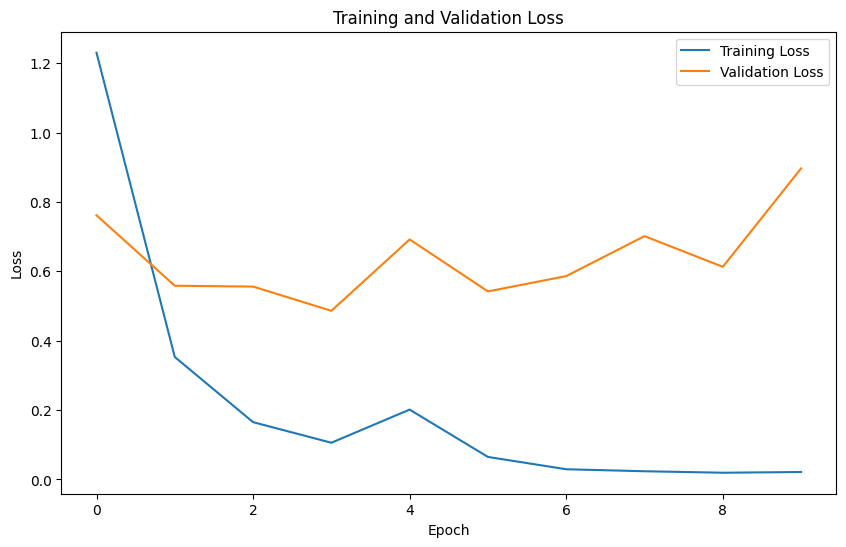

In [76]:
# Plotting the loss function for training and validation sets
# Plotting the loss function for training and validation sets
plt.figure(figsize=(10, 6))
# Access the history using history.history
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [39]:
# Predicting on test data
y_test_predictions = model.predict(X_test_padded)
y_test_pred_classes = np.argmax(y_test_predictions, axis=1)

# Calculate metrics for test data
accuracy = accuracy_score(y_test, y_test_pred_classes)
precision = precision_score(y_test, y_test_pred_classes, average='macro')
recall = recall_score(y_test, y_test_pred_classes, average='macro')
f1 = f1_score(y_test, y_test_pred_classes, average='macro')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [40]:
# Display results
results = pd.DataFrame({
    'model': ['LSTM'],
    'precision': [precision],
    'recall': [recall],
    'F1': [f1],
    'accuracy': [accuracy]
})
print("Test Results:")
print(results)

Test Results:
  model  precision    recall        F1  accuracy
0  LSTM   0.884246  0.883243  0.879926  0.881737


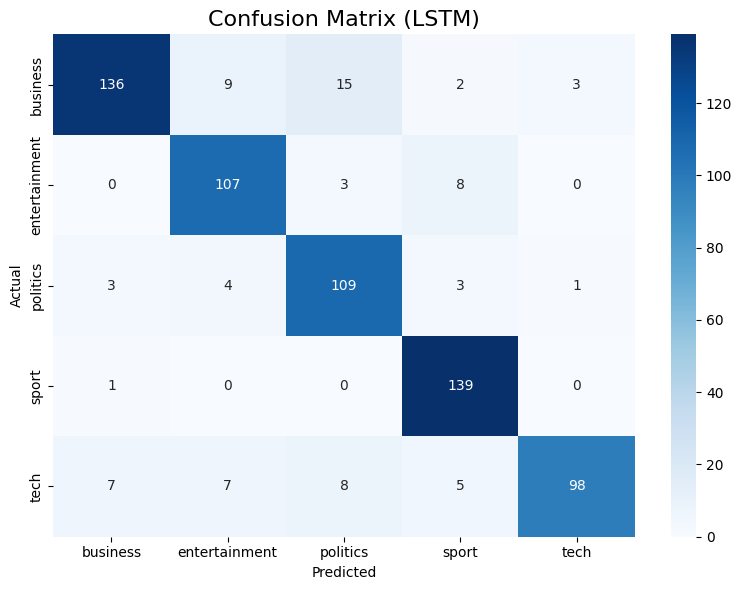

In [41]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_classes)
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix (LSTM)', fontsize=16)
ax.xaxis.set_ticklabels(label_encoder.classes_, fontsize=10)
ax.yaxis.set_ticklabels(label_encoder.classes_, fontsize=10)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

In [43]:
# prompt: test the model randomly selecting 3 values, sow the prediction and the actual value

# Select 3 random indices from the test data
random_indices = random.sample(range(len(X_test)), 5)

# Loop through the selected indices
for index in random_indices:
    # Get the text and true label
    text = X_test.iloc[index]
    true_label = y_test[index]

    # Preprocess the text for prediction
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length)

    # Predict the category
    prediction = model.predict(text_padded)
    predicted_label = np.argmax(prediction)

    # Decode the predicted label
    predicted_category = label_encoder.inverse_transform([predicted_label])[0]
    true_category = label_encoder.inverse_transform([true_label])[0]

    # Print the results
    print(f"Text: {text[:100]}...")  # Print the first 100 characters of the text
    print(f"Predicted Category: {predicted_category}")
    print(f"Actual Category: {true_category}")
    print("-" * 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Text: federer breezes semifinals roger federer reached last four qatar open easy win seventh seed felician...
Predicted Category: sport
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Text: blair backs preelection budget tony blair backed chancellor gordon browns prebudget report amid oppo...
Predicted Category: politics
Actual Category: politics
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Text: wipro beats forecasts wipro indias thirdbiggest software firm reported rise profit topping market ex...
Predicted Category: business
Actual Category: business
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Text: fileswappers ready new network legal attacks websites help people swap pirated films forced developm...
Predicted Category: tech
Actual Category: tech
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Text: security warning fbi virus us federal bureau investigation warning compute

In [45]:
# prompt: create an input box for entering text as a testing input for this model, show the predicted category.

#@title Enter text for category prediction
text_input = "policy" #@param {type:"string"}

# Preprocess the text input
text_sequence = tokenizer.texts_to_sequences([text_input])
text_padded = pad_sequences(text_sequence, maxlen=max_length)

# Predict the category
prediction = model.predict(text_padded)
predicted_label = np.argmax(prediction)

# Decode the predicted label
predicted_category = label_encoder.inverse_transform([predicted_label])[0]

# Print the predicted category
print(f"Predicted Category: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Category: entertainment


In [ ]:
# prompt: test 5 randomly selected texts from sport category only and test the predictions

# Select 5 random indices from the test data belonging to the 'sport' category
sport_indices = df[df['labels'] == 'sport'].index.tolist()
random_sport_indices = random.sample(sport_indices, 5)

# Loop through the selected indices
for index in random_sport_indices:
    # Get the text and true label
    text = df['text'].iloc[index]
    true_label = df['labels'].iloc[index]

    # Preprocess the text for prediction
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length)

    # Predict the category
    prediction = model.predict(text_padded)
    predicted_label = np.argmax(prediction)

    # Decode the predicted label
    predicted_category = label_encoder.inverse_transform([predicted_label])[0]

    # Print the results
    print(f"Text: {text[:100]}...")  # Print the first 100 characters of the text
    print(f"Predicted Category: {predicted_category}")
    print(f"Actual Category: {true_label}")
    print("-" * 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Text: saintandre anger absent stars sale sharks director rugby philippe saintandre reopened rugbys clubver...
Predicted Category: sport
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
Text: fear help france laporte france coach bernard laporte believes team scared going game england sunday...
Predicted Category: sport
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Text: candela completes bolton switch bolton boss sam allardyce signed roma defender vincent candela fivem...
Predicted Category: sport
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Text: aragones angered racism fine spain coach luis aragones furious fined spanish football federation com...
Predicted Category: politics
Actual Category: sport
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Text: thanou desperate make return greek sprinter katerina thanou says eager compete